In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
def logsigmoid(x):
    return x - np.log(1+np.exp(x))

In [3]:
def dlogsigmoid(x):
    return 1.0 / (1.0 + np.exp(x))

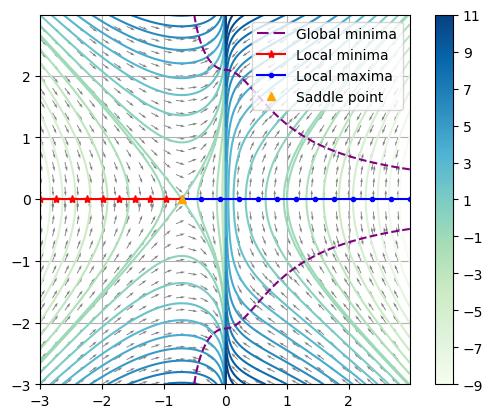

In [4]:
### Code for p+q<1 ###
p = 0.1
q = 0.1
pi1 = p / (p+q)
pi0 = q / (p+q)

# Compute gradient
feature_w = np.arange(-3, 3, 0.2)
feature_e = np.arange(-3, 3, 0.2)
w, e = np.meshgrid(feature_w, feature_e)

b = 0.5*(e**2) + np.log((p-q + np.sqrt((p-q)**2 + 4*p*q*np.exp((1+2*w*np.abs(w))*(e**2))))/(2*q*np.exp((1+2*w*np.abs(w))*(e**2))))
f1 = (0.5+2*w*np.abs(w))*(e**2) + b
f0 = b - 0.5*(e**2)
Lw = -pi1*(-q*dlogsigmoid(-f1)+(1-q)*dlogsigmoid(f1))*4*np.abs(w)*(e**2)
Le = -pi1*(-q*dlogsigmoid(-f1)+(1-q)*dlogsigmoid(f1))*2*e*(0.5 + 2*w*np.abs(w)) -pi0*(-p*dlogsigmoid(f0)+(1-p)*dlogsigmoid(-f0))*e
norm = np.sqrt(Lw**2 + Le**2)

%matplotlib inline
#%matplotlib qt
fig, ax = plt.subplots()
ax.grid()
ax.set_aspect(1)
ax.quiver(feature_w, feature_e, -Lw/norm, -Le/norm, angles='xy', units='width', scale=40, color='grey')

# Compute loss function
feature_w = np.arange(-3, 3, 0.01)
feature_e = np.arange(-3, 3, 0.01)
w, e = np.meshgrid(feature_w, feature_e)

b = 0.5*(e**2) + np.log((p-q + np.sqrt((p-q)**2 + 4*p*q*np.exp((1+2*w*np.abs(w))*(e**2))))/(2*q*np.exp((1+2*w*np.abs(w))*(e**2))))
f1 = (0.5+2*w*np.abs(w))*(e**2) + b
f0 = b - 0.5*(e**2)
L = -pi1 * (q*logsigmoid(-f1) + (1-q)*logsigmoid(f1)) - pi0 * (p*logsigmoid(f0) + (1-p)*logsigmoid(-f0))

# Compute global minima locus
sol = (1+2*w*np.abs(w))*(e**2)
val = np.log((1-p)*(1-q)/(p*q))

E = e**2 - w**2 - np.sign(w)*np.log(np.abs(w))
values = list(range(-9,0)) + [-0.5*(np.log(2)+1)] + list(range(0,12))
cntr1 = ax.contour(w, e, E, values, cmap='GnBu')
cntr2 = ax.contour(w, e, sol, [val], colors='purple', linestyles="dashed")
handles, labels = cntr2.legend_elements()

#plt.axvline(x=-1/np.sqrt(2), color='black', ls='--')
localmin = ax.plot(np.linspace(-3,-1/np.sqrt(2),10),[0]*10, color= 'r', ls="-", marker="*")
localmax = ax.plot(np.linspace(-1/np.sqrt(2),2.99,13),[0]*13, color= 'b', ls="-", marker=".")
saddle = ax.plot([-1/np.sqrt(2)],[0], color='orange', ls="", marker="^")

ax.legend(handles+localmin+localmax+saddle, ["Global minima", "Local minima", "Local maxima", "Saddle point"])

norm= colors.Normalize(vmin=min(cntr1.cvalues), vmax=max(cntr1.cvalues))
sm = plt.cm.ScalarMappable(norm=norm, cmap = cntr1.cmap)
sm.set_array([])
fig.colorbar(sm, ticks=np.arange(-9,12,2), ax=ax)

(-3.0, 3.0)

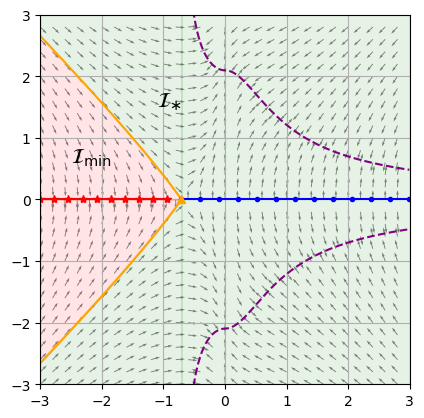

In [26]:
p = 0.1
q = 0.1
pi1 = p / (p+q)
pi0 = q / (p+q)

# Compute gradient
feature_w = np.arange(-3, 3, 0.2)
feature_e = np.arange(-3, 3, 0.2)
w, e = np.meshgrid(feature_w, feature_e)

b = 0.5*(e**2) + np.log((p-q + np.sqrt((p-q)**2 + 4*p*q*np.exp((1+2*w*np.abs(w))*(e**2))))/(2*q*np.exp((1+2*w*np.abs(w))*(e**2))))
f1 = (0.5+2*w*np.abs(w))*(e**2) + b
f0 = b - 0.5*(e**2)
Lw = -pi1*(-q*dlogsigmoid(-f1)+(1-q)*dlogsigmoid(f1))*4*np.abs(w)*(e**2)
Le = -pi1*(-q*dlogsigmoid(-f1)+(1-q)*dlogsigmoid(f1))*2*e*(0.5 + 2*w*np.abs(w)) -pi0*(-p*dlogsigmoid(f0)+(1-p)*dlogsigmoid(-f0))*e
norm = np.sqrt(Lw**2 + Le**2)

%matplotlib inline
#%matplotlib qt
fig, ax = plt.subplots()
ax.grid()
ax.set_aspect(1)
ax.quiver(feature_w, feature_e, -Lw/norm, -Le/norm, angles='xy', units='width', scale=40, color='grey')

# Compute region separation
feature_w = np.arange(-3, -1/np.sqrt(2), 0.0001)
feature_e = np.arange(-3, 3, 0.001)
w, e = np.meshgrid(feature_w, feature_e)
E1 = np.sqrt(feature_w**2 + np.sign(feature_w)*np.log(np.abs(feature_w)) - 0.5*(np.log(2)+1))
E2 = -np.sqrt(feature_w**2 + np.sign(feature_w)*np.log(np.abs(feature_w)) - 0.5*(np.log(2)+1))
e1 = ax.plot(feature_w,E1, color='orange')
e2 = ax.plot(feature_w,E2, color='orange')
ax.fill_between(feature_w, E1, 3, color='green', alpha=0.1)
ax.fill_between(feature_w, E2, -3, color='green', alpha=0.1)
#ax.fill_between(feature_w, E1, 0, where=(feature_w > -1/np.sqrt(2)), color='green', alpha=0.1)
#ax.fill_between(feature_w, E2, 0, where=(feature_w > -1/np.sqrt(2)), color='green', alpha=0.1)
ax.fill_between(np.arange(-1/np.sqrt(2), 3, 0.0001), -3, 3, color='green', alpha=0.1)
ax.fill_between(feature_w, E1, 0, where=(feature_w < -1/np.sqrt(2)), color='red', alpha=0.1)
ax.fill_between(feature_w, E2, 0, where=(feature_w < -1/np.sqrt(2)), color='red', alpha=0.1)

# Compute global minima locus
feature_w = np.arange(-1/np.sqrt(2), 3, 0.01)
feature_e = np.arange(-3, 3, 0.01)
globalmin1 = np.sqrt(np.log((1-p)*(1-q)/(p*q)) / (1+2*feature_w*np.abs(feature_w)))
globalmin2 = -np.sqrt(np.log((1-p)*(1-q)/(p*q)) / (1+2*feature_w*np.abs(feature_w)))
gmin1 = ax.plot(feature_w, globalmin1, color='purple', ls="dashed")
gmin2 = ax.plot(feature_w, globalmin2, color='purple', ls="dashed")

#plt.axvline(x=-1/np.sqrt(2), color='black', ls='--')
localmin = ax.plot(np.linspace(-3,-1/np.sqrt(2),10, endpoint=False),[0]*10, color= 'r', ls="-", marker="*")
localmax = ax.plot(np.linspace(-1/np.sqrt(2),2.99,13),[0]*13, color= 'b', ls="-", marker=".")
saddle = ax.plot([-1/np.sqrt(2)],[0], color='orange', ls="", marker="^")
ax.text(-2.5, 0.6, r'$\mathcal{I}_{\min}$', fontsize=15)
ax.text(-1.1, 1.5, r'$\mathcal{I}_{\ast}$', fontsize=15)

plt.xlim((-3,3))
plt.ylim((-3,3))

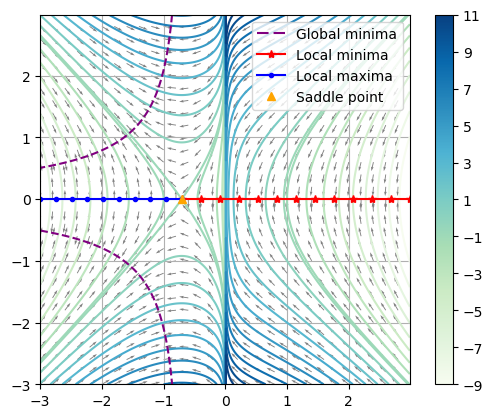

In [17]:
### Code for p+q>1 ###
p = 0.9
q = 0.9
pi1 = p / (p+q)
pi0 = q / (p+q)

# Compute gradient
feature_w = np.arange(-3, 3, 0.2)
feature_e = np.arange(-3, 3, 0.2)
w, e = np.meshgrid(feature_w, feature_e)

b = 0.5*(e**2) + np.log((p-q + np.sqrt((p-q)**2 + 4*p*q*np.exp((1+2*w*np.abs(w))*(e**2))))/(2*q*np.exp((1+2*w*np.abs(w))*(e**2))))
f1 = (0.5+2*w*np.abs(w))*(e**2) + b
f0 = b - 0.5*(e**2)
Lw = -pi1*(-q*dlogsigmoid(-f1)+(1-q)*dlogsigmoid(f1))*4*np.abs(w)*(e**2)
Le = -pi1*(-q*dlogsigmoid(-f1)+(1-q)*dlogsigmoid(f1))*2*e*(0.5 + 2*w*np.abs(w)) -pi0*(-p*dlogsigmoid(f0)+(1-p)*dlogsigmoid(-f0))*e
norm = np.sqrt(Lw**2 + Le**2)

#%matplotlib inline
#%matplotlib qt
fig, ax = plt.subplots()
ax.grid()
ax.set_aspect(1)
ax.quiver(feature_w, feature_e, -Lw/norm, -Le/norm, angles='xy', units='width', scale=40, color='grey')

# Compute loss function
feature_w = np.arange(-3, 3, 0.01)
feature_e = np.arange(-3, 3, 0.01)
w, e = np.meshgrid(feature_w, feature_e)

b = 0.5*(e**2) + np.log((p-q + np.sqrt((p-q)**2 + 4*p*q*np.exp((1+2*w*np.abs(w))*(e**2))))/(2*q*np.exp((1+2*w*np.abs(w))*(e**2))))
f1 = (0.5+2*w*np.abs(w))*(e**2) + b
f0 = b - 0.5*(e**2)
L = -pi1 * (q*logsigmoid(-f1) + (1-q)*logsigmoid(f1)) - pi0 * (p*logsigmoid(f0) + (1-p)*logsigmoid(-f0))

# Compute global minima locus
sol = (1+2*w*np.abs(w))*(e**2)
val = np.log((1-p)*(1-q)/(p*q))

E = e**2 - w**2 - np.sign(w)*np.log(np.abs(w))
values = list(range(-9,0)) + [-0.5*(np.log(2)+1)] + list(range(0,12))
cntr1 = ax.contour(w, e, E, values, cmap='GnBu')
cntr2 = ax.contour(w, e, sol, [val], colors='purple', linestyles="dashed")
handles, labels = cntr2.legend_elements()

#plt.axvline(x=-1/np.sqrt(2), color='black', ls='--')
localmin = ax.plot(np.linspace(-1/np.sqrt(2),2.99,13),[0]*13, color= 'r', ls="-", marker="*")
localmax = ax.plot(np.linspace(-3,-1/np.sqrt(2),10),[0]*10, color= 'b', ls="-", marker=".")
saddle = ax.plot([-1/np.sqrt(2)],[0], color='orange', ls="", marker="^")

ax.legend(handles+localmin+localmax+saddle, ["Global minima", "Local minima", "Local maxima", "Saddle point"])

norm= colors.Normalize(vmin=min(cntr1.cvalues), vmax=max(cntr1.cvalues))
sm = plt.cm.ScalarMappable(norm=norm, cmap = cntr1.cmap)
sm.set_array([])
fig.colorbar(sm, ticks=np.arange(-9,12,2), ax=ax)

(-3.0, 3.0)

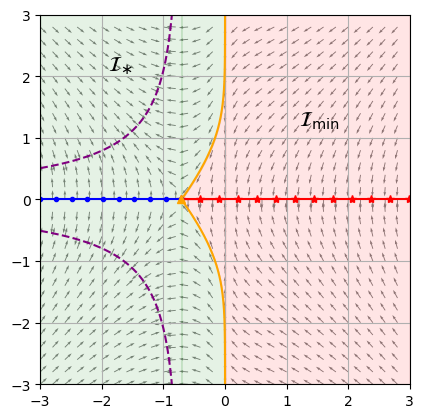

In [25]:
p = 0.9
q = 0.9
pi1 = p / (p+q)
pi0 = q / (p+q)

# Compute gradient
feature_w = np.arange(-3, 3, 0.2)
feature_e = np.arange(-3, 3, 0.2)
w, e = np.meshgrid(feature_w, feature_e)

b = 0.5*(e**2) + np.log((p-q + np.sqrt((p-q)**2 + 4*p*q*np.exp((1+2*w*np.abs(w))*(e**2))))/(2*q*np.exp((1+2*w*np.abs(w))*(e**2))))
f1 = (0.5+2*w*np.abs(w))*(e**2) + b
f0 = b - 0.5*(e**2)
Lw = -pi1*(-q*dlogsigmoid(-f1)+(1-q)*dlogsigmoid(f1))*4*np.abs(w)*(e**2)
Le = -pi1*(-q*dlogsigmoid(-f1)+(1-q)*dlogsigmoid(f1))*2*e*(0.5 + 2*w*np.abs(w)) -pi0*(-p*dlogsigmoid(f0)+(1-p)*dlogsigmoid(-f0))*e
norm = np.sqrt(Lw**2 + Le**2)

#%matplotlib inline
#%matplotlib qt
fig, ax = plt.subplots()
ax.grid()
ax.set_aspect(1)
ax.quiver(feature_w, feature_e, -Lw/norm, -Le/norm, angles='xy', units='width', scale=40, color='grey')

# Compute region separation
feature_w = np.arange(-1/np.sqrt(2), 0, 0.0001)
feature_e = np.arange(-3, 3, 0.001)
w, e = np.meshgrid(feature_w, feature_e)
E1 = np.sqrt(feature_w**2 + np.sign(feature_w)*np.log(np.abs(feature_w)) - 0.5*(np.log(2)+1))
E2 = -np.sqrt(feature_w**2 + np.sign(feature_w)*np.log(np.abs(feature_w)) - 0.5*(np.log(2)+1))
e1 = ax.plot(feature_w,E1, color='orange')
e2 = ax.plot(feature_w,E2, color='orange')
ax.fill_between(feature_w, E1, 3, color='green', alpha=0.1)
ax.fill_between(feature_w, E2, -3, color='green', alpha=0.1)
ax.fill_between(np.arange(-3, -1/np.sqrt(2), 0.0001), -3, 3, color='green', alpha=0.1)
ax.fill_between(feature_w, E1, 0, where=(feature_w > -1/np.sqrt(2)), color='red', alpha=0.1)
ax.fill_between(feature_w, E2, 0, where=(feature_w > -1/np.sqrt(2)), color='red', alpha=0.1)
ax.fill_between(np.arange(0, 3, 0.0001), -3, 3, color='red', alpha=0.1)
#ax.fill_between(feature_w, E1, 0, where=(feature_w < -1/np.sqrt(2)), color='green', alpha=0.1)
#ax.fill_between(feature_w, E2, 0, where=(feature_w < -1/np.sqrt(2)), color='green', alpha=0.1)

# Compute global minima locus
feature_w = np.arange(-3, -1/np.sqrt(2), 0.01)
feature_e = np.arange(-3, 3, 0.01)
globalmin1 = np.sqrt(np.log((1-p)*(1-q)/(p*q)) / (1+2*feature_w*np.abs(feature_w)))
globalmin2 = -np.sqrt(np.log((1-p)*(1-q)/(p*q)) / (1+2*feature_w*np.abs(feature_w)))
gmin1 = ax.plot(feature_w, globalmin1, color='purple', ls="dashed")
gmin2 = ax.plot(feature_w, globalmin2, color='purple', ls="dashed")

#plt.axvline(x=-1/np.sqrt(2), color='black', ls='--')
localmin = ax.plot(np.linspace(-1/np.sqrt(2),2.99,13),[0]*13, color= 'r', ls="-", marker="*")
localmax = ax.plot(np.linspace(-3,-1/np.sqrt(2),10),[0]*10, color= 'b', ls="-", marker=".")
saddle = ax.plot([-1/np.sqrt(2)],[0], color='orange', ls="", marker="^")
ax.text(1.2, 1.2, r'$\mathcal{I}_{\min}$', fontsize=15)
ax.text(-1.9, 2.1, r'$\mathcal{I}_{\ast}$', fontsize=15)

plt.xlim((-3,3))
plt.ylim((-3,3))

In [33]:
### 3D loss plot ###
feature_w = np.arange(-2, 0, 0.01)
feature_e = np.arange(-2, 2, 0.01)
w, e = np.meshgrid(feature_w, feature_e)

# Compute loss function
b = 0.5*(e**2) + np.log((p-q + np.sqrt((p-q)**2 + 4*p*q*np.exp((1+2*w*np.abs(w))*(e**2))))/(2*q*np.exp((1+2*w*np.abs(w))*(e**2))))
f1 = (0.5+2*w*np.abs(w))*(e**2) + b
f0 = b - 0.5*(e**2)
L = -pi1 * (q*logsigmoid(-f1) + (1-q)*logsigmoid(f1)) - pi0 * (p*logsigmoid(f0) + (1-p)*logsigmoid(-f0))

# Compute global minima locus
sol = (1+2*w*np.abs(w))*(e**2)
val = np.log((1-p)*(1-q)/(p*q))

#%matplotlib inline
#%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(w, e, L, cmap='plasma',vmin=0.6, vmax=1.5, alpha=0.9)
ax.contour(w, e, sol, [val], zdir='z', offset=0, colors='green')
ax.set(xlim=(-2, 0), ylim=(-2, 2), zlim=(0, 2))

[(-2.0, 0.0), (-2.0, 2.0), (0.0, 2.0)]